In [1]:

from get_summary import *
from plots import *
import texttable, latextable

font = {
#     'family' : 'normal',
#         'weight' : 'bold',
        'size'   : 14}

matplot.rc('font', **font)

def remove_algo_from(data):
    data = data.loc[((data["algorithm"]!="CBSH-RM")&(data["algorithm"]!="CBSH")) | ((data["algorithm"]=="CBSH-RM") & (data["corridor"]==True)& (data["target"]==True))]
    return data

def remove_k6_from(data):
    data = data.loc[data["k"]!=6]
    return data

def remove_cbs_from(data):
    data = data.loc[data["algorithm"]!="CBS"]
    return data

def only_ltcbshrct_from(data):
    data = data.loc[((data["algorithm"]=="CBSH-RM") & (data["corridor"]==True) & (data["target"]==True) & (data["ignore-train"]==False))]
    return data

def plot_lltp(data,title,w = 4, show_x_label = False,show_y_label = False, legend = False):
    data_a = []
    data_b = []
    data_a_error = []    
    data_b_error = []

    ticks = []
    x = []

    data = data[(data["solution_cost"]>=0) & (data["algorithm"]=="CBSH-RM") &  (data["corridor"]==True) & (data["target"]==True) & (data["ignore-train"] == False)]
    kGroups = data.groupby("k")
    for k, kGroup in kGroups:
        data_a.append(kGroup["num_llpp"].mean())
        data_a_error.append(kGroup["num_llpp"].sem())
        data_b.append(kGroup["num_lltp"].mean())
        data_b_error.append(kGroup["num_lltp"].sem())

        ticks.append(k)


    def set_box_color(bp, color):
        plt.setp(bp['boxes'], color=color)
        plt.setp(bp['whiskers'], color=color)
        plt.setp(bp['caps'], color=color)
        plt.setp(bp['medians'], color=color)

    plt.figure(figsize=(w, 2.5))


    # bpl = plt.plot(data_a, positions=np.array(range(len(data_a)))*2.0-0.4, sym='', widths=0.6)
    # bpr = plt.plot(data_b, positions=np.array(range(len(data_b)))*2.0+0.4, sym='', widths=0.6)

    # set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
    # set_box_color(bpr, '#2C7BB6')


    # draw temporary red and blue lines and use them to create a legend
    plt.plot(ticks, data_a, c='#D7191C', label='LLPP',marker="^")
    plt.plot(ticks, data_b, c='#2C7BB6', label='LLTP', marker="*")
#     plt.errorbar(ticks, data_a, yerr=data_a_error,color='#D7191C',ecolor='#D7191C', fmt='.k');
#     plt.errorbar(ticks, data_b, yerr=data_b_error,color='#2C7BB6',ecolor='#2C7BB6', fmt='.k');
    plt.fill_between(ticks, np.array(data_a) - np.array(data_a_error), np.array(data_a) + np.array(data_a_error),
                     color='#e57373', alpha=0.2)
    plt.fill_between(ticks, np.array(data_b) - np.array(data_b_error), np.array(data_b) + np.array(data_b_error),
                     color='#64b5f6', alpha=0.2)
    if(legend):
        plt.legend(loc = "upper left")

#     plt.xticks(range(0, len(ticks) * 2, 2), ticks)
    # plt.xlim(-2, len(ticks)*2)
    # plt.ylim(0, 8)
    if(show_x_label):
        plt.xlabel("$k_{max}$", fontsize = 14)
    if show_y_label:
        plt.ylabel("Search Amounts")
    plt.title(title,loc="right",y=0.8)
    plt.tight_layout()
    plt.savefig('./figures/ll-{}.png'.format(title),bbox_inches='tight')
    plt.show()
    plt.close()

def no_lltp_table(datas):

    table = texttable.Texttable()
    
    header = [ "k"]
    
    cols = 1
    for data,name in datas:
        header.append(name)
        header+=["llpp","lltp"]
        cols +=3
    table.set_cols_align(["l"] * cols)
    table.set_cols_valign(["m"]* cols)
    rows = [header]

    for k in [2,4,8]:
        row = [k]
        for data,name in datas:
            temp = data[(data["k"]==k)&(data["solution_cost"]>=0) & (data["algorithm"]=="CBSH-RM") &  (data["corridor"]==True) & (data["target"]==True) & (data["ignore-train"] == False)]
            llpp_mean = round(temp["num_llpp"].mean(),2)
            llpp_err = round(2*temp["num_llpp"].sem(),2)
            lltp_mean = round(temp["num_lltp"].mean(),2)
            lltp_err = round(2*temp["num_lltp"].sem(),2)
            
            all_success = len(temp)
            no_tp = temp[temp["num_lltp"] ==0]
            
            row.append("${}$".format(round(len(no_tp)/all_success,2)))
            row.append("${}\pm{}$".format(llpp_mean,llpp_err))
            row.append("${}\pm{}$".format(lltp_mean,lltp_err))

        rows.append(row)
    table.add_rows(rows)
#     print(table.draw())
    print(latextable.draw_latex(table, caption="CAPTAIN.", label="table") + "\n")

# Den520d

found 1501 csv
Find 1500 entries


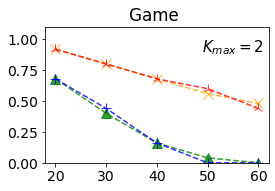

<Figure size 576x72 with 0 Axes>

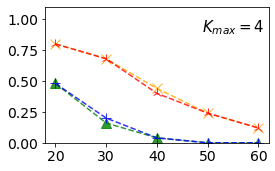

<Figure size 576x72 with 0 Axes>

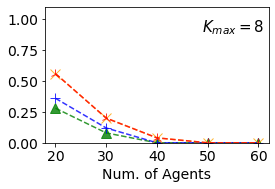

<Figure size 576x72 with 0 Axes>

In [9]:
folder3 = "./2022-may-variant1-m1/den520d-even-90"
get_summary_m2(folder3)
d520d_shrink = pd.read_csv(folder3+"/summary.csv")

plotRate(d520d_shrink,"Game","algorithm", "MTPF",False)


In [10]:
solutionCheck(d520d_shrink)

# 32x32 10% obstacle

found 1501 csv
Find 1500 entries


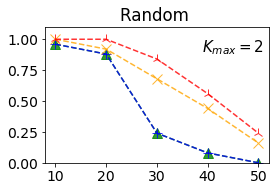

<Figure size 576x72 with 0 Axes>

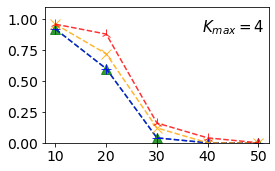

<Figure size 576x72 with 0 Axes>

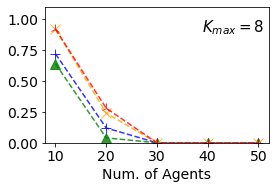

<Figure size 576x72 with 0 Axes>

In [6]:
folder3 = "./2022-may-variant1-m1/random-32-32-10-even-90"
get_summary_m2(folder3)
shrink_32_32 = pd.read_csv(folder3+"/summary.csv")

plotRate(shrink_32_32,"Random","algorithm","MTPF",False)


In [7]:
solutionCheck(shrink_32_32)

# large Warehouse

found 1501 csv
Find 1500 entries
Success Instance Avg HL_expanded


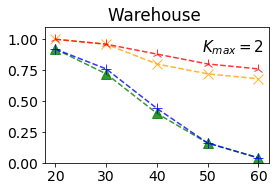

<Figure size 576x72 with 0 Axes>

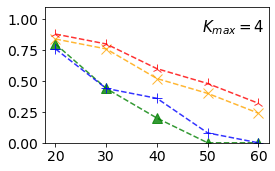

<Figure size 576x72 with 0 Axes>

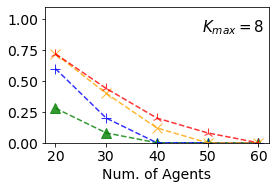

<Figure size 576x72 with 0 Axes>

In [4]:
folder3 = "./2022-may-variant1-m1/warehouse-10-20-10-2-1-even-90"
get_summary_m2(folder3)
train_shrink_warehouse = pd.read_csv(folder3+"/summary.csv")

plotRate(train_shrink_warehouse,"Warehouse","algorithm","LZPF",False)
print("Success Instance Avg HL_expanded")
# plotSuccessNodes(train_full_park_warehouse,"Success Instance Avg HL_expanded","LZPF")

In [5]:
solutionCheck(train_shrink_warehouse)

# ROOM

found 1801 csv
Find 1800 entries


/Users/zche0040/Codes/research/MTCBS/CBS-exp/plots.py:139: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figlegend.show()
/Users/zche0040/Codes/research/MTCBS/CBS-exp/plots.py:141: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


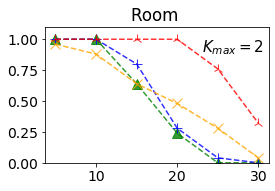

<Figure size 576x72 with 0 Axes>

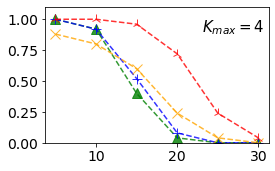

<Figure size 576x72 with 0 Axes>

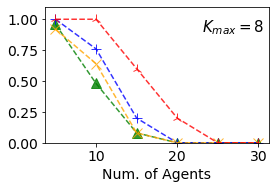

<Figure size 576x72 with 0 Axes>

In [2]:
folder3 = "./2022-may-variant1-m1/room-32-32-4-even-90"
get_summary_m2(folder3)
train_shrink_room = pd.read_csv(folder3+"/summary.csv")
plotRate(train_shrink_room,"Room","algorithm","",False)


In [3]:
solutionCheck(train_shrink_room)

# Variant 2 Flatland Plot

found 901 csv
Find 900 entries
Success Instance Avg HL_expanded


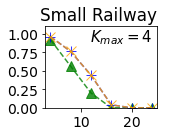

<Figure size 576x72 with 0 Axes>

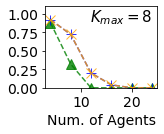

<Figure size 576x72 with 0 Axes>

In [34]:
folder3 = "./2022-may-variant2-m1/small-90"
get_summary_m2(folder3)
train_shrink_flatland= pd.read_csv(folder3+"/summary.csv")
# train_shrink_flatland = remove_algo_from(train_shrink_flatland)
train_shrink_flatland = train_shrink_flatland[train_shrink_flatland["lltp-only"]==False]
train_shrink_flatland = train_shrink_flatland[train_shrink_flatland["agents_No"] <=25]
plotRate(train_shrink_flatland,"Small Railway","algorithm","LZPF",False,figsize=(2,1.5),k_offset=0.4,k_title=4)
print("Success Instance Avg HL_expanded")
# plotSuccessNodes(train_full_park_warehouse,"Success Instance Avg HL_expanded","LZPF")

In [138]:
temp = train_shrink_flatland[train_shrink_flatland["k"] == 4]
temp = temp[temp["agents_No"] == 4]
temp = temp[temp["algorithm"] == "CBS"]
temp = temp[temp["instance"] == 15]

temp = temp.sort_values("instance")
display(temp.iloc[:,0:20])

,agents_No,instance,k,shrink,ignore-target,lltp-only,corridor,target,parking,algo,ignore-train,Runtime,HL_expanded,HL_generated,LL_expanded,LL_generated,agents,solution_cost,cost-dummy,algorithm
32,4,15,4,True,True,False,False,False,False,CBS-DK,False,90.00110,38996,77185,7413914,10700786,NaN,-1,13,CBS
3837,4,15,4,True,True,True,False,False,False,CBS-DK,False,5.24871,2159,4284,507749,723776,NaN,212,14,CBS


found 1201 csv
Find 1200 entries


/Users/zche0040/Codes/research/MTCBS/CBS-exp/plots.py:139: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figlegend.show()
/Users/zche0040/Codes/research/MTCBS/CBS-exp/plots.py:141: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Success Instance Avg HL_expanded


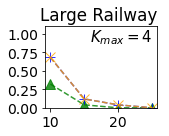

<Figure size 576x72 with 0 Axes>

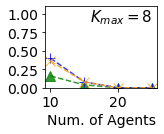

<Figure size 576x72 with 0 Axes>

In [32]:
folder3 = "./2022-may-variant2-m1/large-90"
get_summary_m2(folder3)
train_shrink_flatland_large= pd.read_csv(folder3+"/summary.csv")
# train_shrink_flatland = remove_algo_from(train_shrink_flatland)
train_shrink_flatland_large = train_shrink_flatland_large[train_shrink_flatland_large["lltp-only"] ==False]
train_shrink_flatland_large = train_shrink_flatland_large[train_shrink_flatland_large["agents_No"] <=25]
plotRate(train_shrink_flatland_large,"Large Railway","algorithm","LZPF",False,figsize=(2,1.5),k_offset=0.4,k_title=4)
print("Success Instance Avg HL_expanded")
# plotSuccessNodes(train_full_park_warehouse,"Success Instance Avg HL_expanded","LZPF")

# Variant 3 Plot

found 1040 csv
Find 1039 entries


/Users/zche0040/Codes/research/MTCBS/CBS-exp/plots.py:245: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


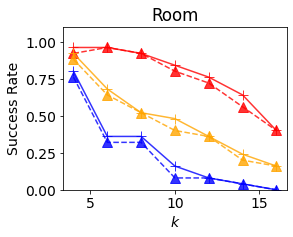

<Figure size 180x144 with 0 Axes>

In [33]:

folder3 = "./2022-may-variant3-m1/room-32-32-4-even-90-long"
get_summary_m2(folder3)
train_full_park_room = pd.read_csv(folder3+"/summary.csv")

plotRateByK(train_full_park_room,"Room","algorithm", "LZPF")

# Avg Num. of LLTP and LLPP

In [44]:
no_lltp_table([(shrink_32_32,"Random")])
no_lltp_table([(train_shrink_room,"Room")])

no_lltp_table([(train_shrink_warehouse,"Warehouse")])
no_lltp_table([(d520d_shrink,"Game")])

\begin{table}
	\begin{center}
		\begin{tabular}{|l|l|l|l|}
			\hline
			k & Random & llpp & lltp \\
			\hline
			2 & $0.87$ & $558.3\pm518.52$ & $1.62\pm2.04$ \\
			\hline
			4 & $0.94$ & $887.06\pm800.33$ & $1.94\pm3.35$ \\
			\hline
			8 & $0.97$ & $577.93\pm923.68$ & $21.87\pm43.73$ \\
			\hline
		\end{tabular}
	\end{center}
	\caption{CAPTAIN.}
	\label{table}
\end{table}

\begin{table}
	\begin{center}
		\begin{tabular}{|l|l|l|l|}
			\hline
			k & Room & llpp & lltp \\
			\hline
			2 & $0.66$ & $2392.46\pm1230.56$ & $1.67\pm1.11$ \\
			\hline
			4 & $0.65$ & $2130.81\pm1187.86$ & $170.67\pm284.33$ \\
			\hline
			8 & $0.64$ & $1636.83\pm995.56$ & $63.53\pm69.01$ \\
			\hline
		\end{tabular}
	\end{center}
	\caption{CAPTAIN.}
	\label{table}
\end{table}

\begin{table}
	\begin{center}
		\begin{tabular}{|l|l|l|l|}
			\hline
			k & Warehouse & llpp & lltp \\
			\hline
			2 & $0.96$ & $146.45\pm89.51$ & $0.32\pm0.58$ \\
			\hline
			4 & $0.91$ & $171.21\pm120.63$ & $0.12\pm0.1$ \\
			\hline

# Low Level Nodes Expansions MT-CBS and LT-CBS

In [ ]:
all_data = pd.concat([remove_k6_from(shrink_32_32),remove_k6_from(train_shrink_room),remove_k6_from(train_shrink_warehouse),remove_k6_from(d520d_shrink)])

In [ ]:
all_cbs = all_data.loc[all_data["algorithm"]=="CBS"]
all_mtcbs = all_cbs.loc[all_cbs["lltp-only"]==True]
all_ltcbs = all_cbs.loc[all_cbs["lltp-only"]==False]

## MT-CBS

In [30]:
all_mt_search = all_mtcbs["num_llpp"].sum()+all_mtcbs["num_lltp"].sum()
all_mt_llnodes = all_mtcbs["LL_expanded"].sum()
print(all_mt_llnodes,all_mt_search, all_mt_llnodes//all_mt_search)

6884874779 19360219 355


## LT-CBS

In [31]:
all_lt_search = all_ltcbs["num_llpp"].sum()+all_ltcbs["num_lltp"].sum()
all_lt_llnodes = all_ltcbs["LL_expanded"].sum()
print(all_lt_llnodes,all_lt_search, all_lt_llnodes//all_lt_search)

3994629839 22132208 180
